In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
import time

In [6]:
df = pd.read_csv('GOOGL.csv')

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [8]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700
4430,2022-03-24,2784.000000,2832.379883,2755.010010,2831.439941,2831.439941,1317900


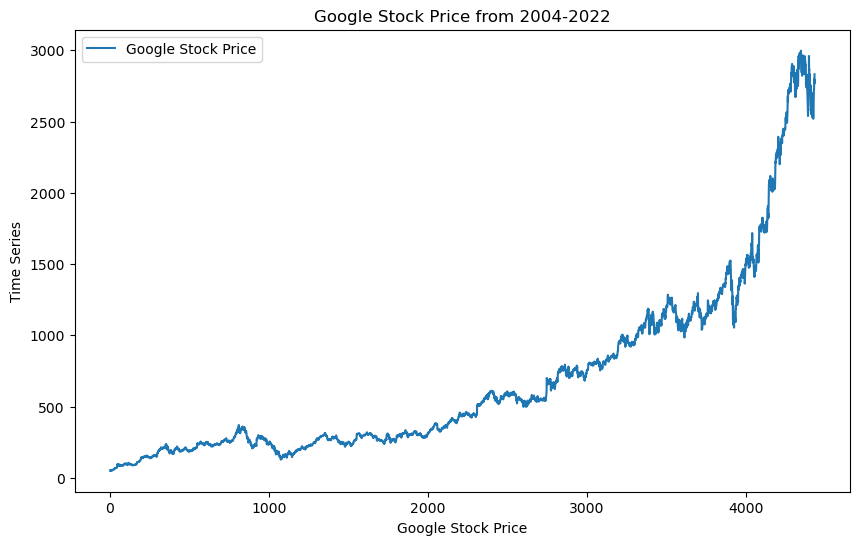

In [9]:
plt.figure(figsize = (10,6))
plt.plot(df['Close'],label='Google Stock Price')
plt.xlabel('Google Stock Price')
plt.ylabel('Time Series')
plt.title('Google Stock Price from 2004-2022')
plt.legend()
plt.show()

In [14]:
scaler=MinMaxScaler(feature_range=(0,1))
df['Close_Scaled']=scaler.fit_transform(df['Close'].values.reshape(-1,1))

In [20]:
def create_dataset(data, time_steps):
    X,y= [],[]
    for i in range(len(data) - time_steps):
        X.append(data[i:(i+time_steps)])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

In [21]:
time_steps=30
X,y=create_dataset(df['Close_Scaled'].values,time_steps)
split=int(0.8*len(X))
X_train, X_test=X[:split],X[split:]
y_train, y_test=y[:split],y[split:]

In [24]:
print(split)

3520


In [25]:
df.iloc[3520]

Date             2018-08-13
Open            1251.199951
High            1265.969971
Low             1247.030029
Close           1248.640015
Adj Close       1248.640015
Volume              1375000
Close_Scaled       0.406753
Name: 3520, dtype: object

In [27]:
model=Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(units=50),
    Dense(units=1)
])

In [32]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [33]:
start_time=time.time()

In [34]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10

88/88 [==============================] - 11s 54ms/step - loss: 3.8787e-04 - val_loss: 1.2392e-04
Epoch 2/10
88/88 [==============================] - 3s 35ms/step - loss: 2.4492e-05 - val_loss: 9.9421e-05
Epoch 3/10
88/88 [==============================] - 4s 42ms/step - loss: 2.4042e-05 - val_loss: 1.2609e-04
Epoch 4/10
88/88 [==============================] - 3s 35ms/step - loss: 2.1951e-05 - val_loss: 1.0175e-04
Epoch 5/10
88/88 [==============================] - 3s 36ms/step - loss: 2.0145e-05 - val_loss: 8.7443e-05
Epoch 6/10
88/88 [==============================] - 3s 35ms/step - loss: 2.0632e-05 - val_loss: 9.7619e-05
Epoch 7/10
88/88 [==============================] - 3s 37ms/step - loss: 2.0944e-05 - val_loss: 7.9052e-05
Epoch 8/10
88/88 [==============================] - 3s 34ms/step - loss: 2.1455e-05 - val_loss: 1.5200e-04
Epoch 9/10
88/88 [==============================] - 3s 34ms/step - loss: 2.0182e-05 - val_loss: 7.5821e-05
Epoch 10/10
88/88 [================

In [35]:
training_time = time.time()-start_time
print("Training time:",training_time, "Seconds")

Training time: 136.59914660453796 Seconds


In [36]:
loss = model.evaluate(X_test, y_test)
print("Test loss", loss)

28/28 [==============================] - 2s 17ms/step - loss: 6.6494e-04
Test loss 0.0006649380084127188


In [37]:
start_time=time.time()

In [38]:
predictions=model.predict(X_test)

28/28 [==============================] - 2s 13ms/step


In [39]:
prediction_time=time.time() - start_time
print("Prediction time:", prediction_time, "seconds")

Prediction time: 61.14797878265381 seconds


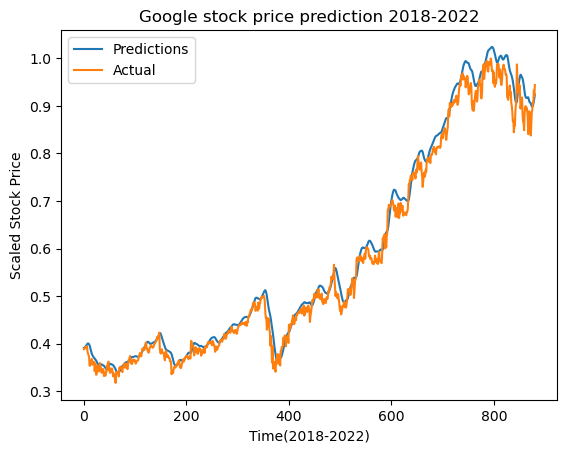

In [40]:
plt.plot(predictions, label='Predictions')
plt.plot(y_test, label='Actual')
plt.xlabel('Time(2018-2022)')
plt.ylabel('Scaled Stock Price')
plt.title("Google stock price prediction 2018-2022")
plt.legend()
plt.show()